In [1]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [14]:
clf=DecisionTreeClassifier()


In [16]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [19]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6373239436619718

In [26]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [27]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [28]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf= trf.fit_transform(X_test)

In [30]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [29]:
trf.named_transformers_['first'].n_bins_

array([10])

In [31]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1. , 11. , 17. , 20.6, 24. , 28. , 30.1, 34.4, 38.6, 47.8, 62. ])],
      dtype=object)

In [32]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.74336,   7.925  ,   8.6625 ,  10.5    ,  14.4542 ,
               22.62   ,  28.39   ,  38.1    ,  57.78336, 512.3292 ])          ],
      dtype=object)

In [34]:
output = pd.DataFrame ({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [36]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [37]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
683,14.0,1.0,46.9000,7.0,"(11.0, 17.0]","(38.1, 57.783]"
698,49.0,8.0,110.8833,9.0,"(47.8, 62.0]","(57.783, 512.329]"
798,30.0,5.0,7.2292,0.0,"(28.0, 30.1]","(0.0, 7.743]"
269,35.0,6.0,135.6333,9.0,"(34.4, 38.6]","(57.783, 512.329]"
575,19.0,2.0,14.5000,4.0,"(17.0, 20.6]","(14.454, 22.62]"


In [38]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test_trf)

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
accuracy_score(y_test,y_pred2)

0.40559440559440557

In [40]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6401408450704225

In [41]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1]),
    ])
    
    x_trf= trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After')
    
    plt.show()
    
    
    

0.6331181533646323


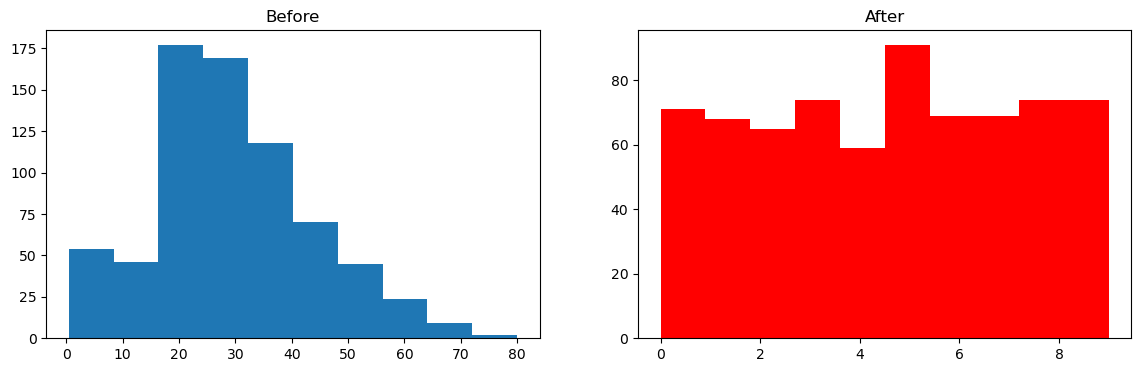

In [42]:
discretize(10,'quantile')

In [44]:
def discretize1(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1]),
    ])
    
    x_trf= trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('After')
    
    plt.show()

0.630281690140845


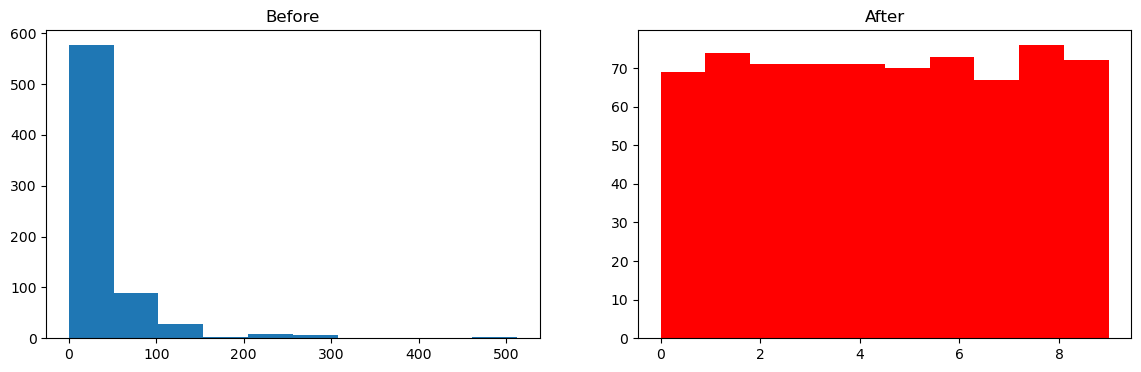

In [45]:
discretize1(10,'quantile')

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6345266040688575


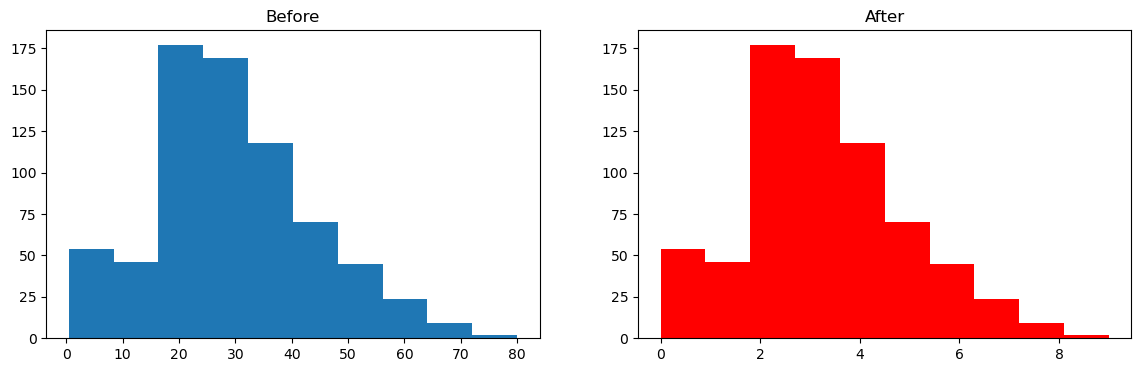

In [46]:
discretize(10,'uniform')

D:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
D:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

0.6372848200312988


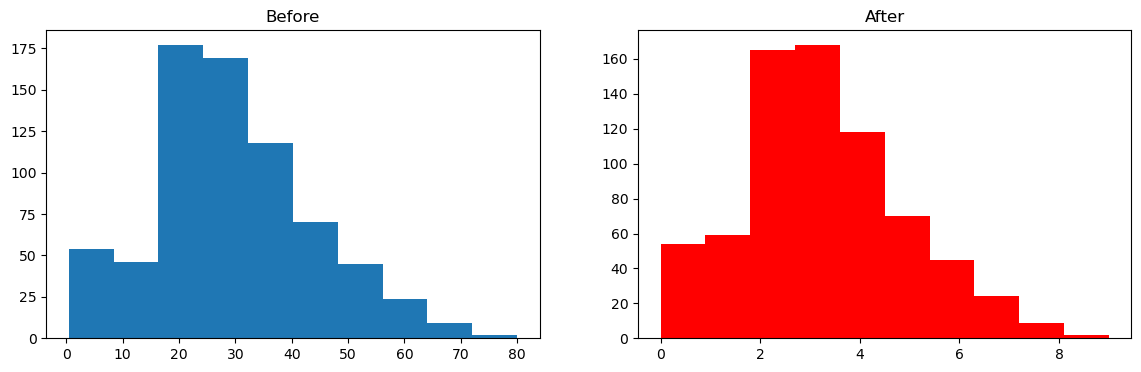

In [47]:
discretize(10,'kmeans')